In [1]:
ls

input_data  input_data2  sample_data/


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use('ggplot')
input_data = pd.read_csv('input_data', delimiter = ' ', names = ['index', 'x', 'y'])

In [3]:
input_data.head()

,index,x,y
0,1,82,76
1,2,96,44
2,3,50,5
3,4,49,8
4,5,13,7


In [4]:
def get_angle(x,y):
    x_0 = input_data.iloc[0]['x']
    y_0 = input_data.iloc[1]['x']
    
    slope = (y - y_0)/(x - x_0)
    return slope

def distance(x1, y1, x2, y2):
    #print("Finding distance between ("+str(x1)+","+str(y1)+") and "+"("+str(x2)+","+str(y2)+")")
    dist = math.sqrt(pow((x2 - x1),2) + pow((y2 - y1),2))
    return dist


def find_cost(array_x, array_y):
    first_x = array_x[0]
    first_y = array_y[0]
    first = 1
    total_dist = 0
    cost = 0
    for i in range(0, len(array_x)):
        x1 = array_x[i]
        y1 = array_y[i]

        if first == 1:
                dist = distance(x1, y1, first_x, first_y)
                first = 0
        else:
                dist = distance(x1, y1, x2_prev, y2_prev)
        x2_prev = x1
        y2_prev = y1
        total_dist = total_dist + dist
    return total_dist


def plot_routes(routes):
    plt.scatter(input_data['x'], input_data['y'])


    r2x = []
    r2y = []
    total_route_cost = 0
    x_for_route = []
    y_for_route = []
    
    count=0
    colors=['r','g','b','y','c']
    for item in routes:
        for i in item:
            r2x.append(input_data.iloc[i]['x'])
            r2y.append(input_data.iloc[i]['y'])
            plt.annotate(i, # this is the text
             (input_data.iloc[i]['x'],input_data.iloc[i]['y']), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0,-10), # distance from text to points (x,y)
             ha='center') 
        plt.plot(r2x, r2y, color=colors[count])

        cost = find_cost(r2x, r2y)
        total_route_cost += cost
        print("\nCost for this path = ", cost)
        r2x=[]
        r2y=[]
        count += 1
    print("Fitness = ", total_route_cost)
    plt.show()

13,7,30,17,19,16,31,21,1,12,25,20,5,10,15,29,22,9,18,8,27,11,4,28,24,14,23,3,6,2,26,
Cost for this path =  95.00641104768819

Cost for this path =  47.31280400798114

Cost for this path =  162.43266962097115

Cost for this path =  171.67046959474862

Cost for this path =  171.88744138640664
Fitness =  648.3097956577958


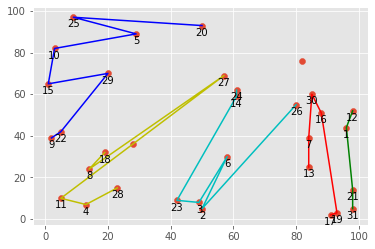

In [5]:
#routes = [[21, 31, 19, 17, 13, 7, 26, 0, 21], [12,1,16,30, 0, 12], [27, 24, 0, 27], [29, 18,8,9,22,15,10,25,5,20, 0, 29], [14,28,11,4,23,3,2,6, 0, 14]]
routes = [[19,20,21,4,5,6], [13,14,15,10,11,12], [1,2,9,16,17,18], [25,26,27,22,23,24], [7,8,3,28,29,30,31]]
# sort routes according to the polar angles
angle_index_map = {}
for i in range(1, 32):
    angle = get_angle(input_data.iloc[i]['x'], input_data.iloc[i]['y'])
    #print("Angle for "+str(i)+" is "+str(angle))
    angle_index_map[angle] = i
    pass
for key in sorted(angle_index_map):
    print(angle_index_map[key],end=",")
# routes = []

# routes = get_initial_state()
routes = [[13,7,30,16,19,17],[31,21,1,12],[20,25,5,10,15,29,22,9],[18,8,27,11,4,28],[24,14,23,3,6,2,26]]
#routes = [[13,7,30,16,19,17],[10,21,1,12],[20,25,5,15,29,22,9],[18,8,27,11,4,28],[24,14,23,3,6,2,26]]


# while True:
#     routes = generate_route()
    

#routes = [[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[19,20,21,22,23,24],[25,26,27,28,29,30,31]]
#routes = [[31,21,1,12,25,20,0,31]]
plot_routes(routes)
# 2opt, 1opt, 3opt

In [6]:
CAPACITY_OF_VEHICLE = 7 #common for all vehicles
NUMBER_OF_VEHICLES = 5

In [7]:
capacities = [1 for i in range(0,32)] #problem statement says capacity to be 1.
#capacities

In [8]:
angle_sorted = [angle_index_map[key] for key in sorted(angle_index_map)]

In [9]:
angle_sorted

[13,
 7,
 30,
 17,
 19,
 16,
 31,
 21,
 1,
 12,
 25,
 20,
 5,
 10,
 15,
 29,
 22,
 9,
 18,
 8,
 27,
 11,
 4,
 28,
 24,
 14,
 23,
 3,
 6,
 2,
 26]

In [10]:
group_size = []
size = len(angle_sorted) // NUMBER_OF_VEHICLES
vehicles_to_assign = len(angle_sorted) 
while vehicles_to_assign > size :
  group_size.append(size)
  vehicles_to_assign = vehicles_to_assign - size
if vehicles_to_assign > 0 :
  for i in range(0,vehicles_to_assign):
    group_size[i] = group_size[i] + 1
group_size


[7, 6, 6, 6, 6]

In [11]:
capacited_routes = []

def generate_capacited_segments_of_routes(angle_sorted):
  start_index = 0
  for i in range(0, len(group_size)):
    capacity_till_now = 0
    j = start_index
    capacity_exceeded = False
    
    while j < start_index+group_size[i]:
        if capacity_till_now + capacities[angle_sorted[j]] > CAPACITY_OF_VEHICLE:
          capacity_till_now = 0
          capacited_routes.append(angle_sorted[start_index:j+1])
          if j < group_size[i]-1:
            capacity_exceeded = True
            group_size[i+1] = group_size[i+1] + group_size[i] - j
          start_index= j + 1
          break
        else:
          capacity_till_now = capacity_till_now + capacities[angle_sorted[j]]
          j = j + 1
    
    if not capacity_exceeded:
      capacited_routes.append(angle_sorted[start_index:j])
      start_index = j

          

print(angle_sorted)


generate_capacited_segments_of_routes(angle_sorted)    


capacited_routes


  


[13, 7, 30, 17, 19, 16, 31, 21, 1, 12, 25, 20, 5, 10, 15, 29, 22, 9, 18, 8, 27, 11, 4, 28, 24, 14, 23, 3, 6, 2, 26]


[[13, 7, 30, 17, 19, 16, 31],
 [21, 1, 12, 25, 20, 5],
 [10, 15, 29, 22, 9, 18],
 [8, 27, 11, 4, 28, 24],
 [14, 23, 3, 6, 2, 26]]

In [12]:
#run genetic algorithm

In [13]:
import random
import itertools

In [14]:

def createRoute(cityList):
        return itertools.permutations(cityList)

In [15]:
print(createRoute([13, 7, 30, 17, 19, 16, 31]))

In [16]:
#create initial population
import itertools
import random
def createInitialPopulation(popSize, cities):
      population = []
      permutations = list(itertools.permutations(cities))
      for i in range(0, popSize):
          population.append(list(permutations[random.randint(0, len(permutations)-2)]))
      return population

In [17]:
createInitialPopulation(100,[13, 7, 30, 17, 19, 16, 31])

[[31, 19, 16, 7, 13, 30, 17],
 [16, 19, 31, 30, 13, 17, 7],
 [16, 31, 30, 19, 17, 13, 7],
 [17, 31, 7, 13, 19, 30, 16],
 [17, 13, 19, 30, 7, 16, 31],
 [31, 7, 16, 17, 19, 13, 30],
 [13, 16, 7, 17, 30, 31, 19],
 [13, 19, 17, 31, 16, 7, 30],
 [17, 13, 31, 19, 7, 16, 30],
 [7, 31, 16, 19, 30, 17, 13],
 [7, 13, 17, 31, 30, 19, 16],
 [16, 7, 17, 31, 13, 19, 30],
 [13, 7, 16, 31, 17, 19, 30],
 [31, 7, 13, 17, 30, 16, 19],
 [13, 31, 7, 17, 19, 30, 16],
 [13, 30, 16, 7, 31, 19, 17],
 [31, 17, 30, 7, 16, 19, 13],
 [31, 17, 13, 19, 16, 7, 30],
 [13, 31, 19, 17, 7, 30, 16],
 [31, 17, 19, 13, 7, 30, 16],
 [13, 30, 7, 16, 19, 17, 31],
 [17, 31, 7, 30, 19, 16, 13],
 [19, 31, 7, 17, 13, 16, 30],
 [19, 17, 7, 13, 16, 31, 30],
 [16, 13, 31, 19, 17, 30, 7],
 [17, 31, 19, 30, 16, 7, 13],
 [31, 19, 30, 17, 13, 7, 16],
 [16, 17, 31, 7, 30, 19, 13],
 [31, 17, 19, 16, 7, 30, 13],
 [31, 16, 19, 30, 13, 17, 7],
 [7, 16, 30, 31, 13, 19, 17],
 [17, 30, 19, 16, 13, 7, 31],
 [30, 17, 13, 31, 7, 19, 16],
 [17, 19, 

In [27]:
EXPECTED_FITNESS_VALUE = 550
THRESHOLD = 25

In [19]:
def find_fitness_of_route(route):
  r2x = []
  r2y = []
  
  for i in route:
          r2x.append(input_data.iloc[i]['x'])
          r2y.append(input_data.iloc[i]['y'])
            

   
  return find_cost(r2x, r2y)
  
  

In [20]:
import operator
def returnRank(population,depot_location):
  fitnessResults = {}
  for i in range(0,len(population)):
      #print('Route = ',population[i],' cost of path = ',find_fitness_of_route(population[i]))
      population[i].insert(0,depot_location)
      population[i].append(depot_location)
      fitnessResults[i] = find_fitness_of_route(population[i])
      population[i].pop(0)
      population[i].pop(len(population[i])-1)
  return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)
        

In [21]:
def selection(popRanked, eliteSize):
        selectionResults = []
        df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
        df['cum_sum'] = df.Fitness.cumsum()
        df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

        for i in range(0, eliteSize):
            selectionResults.append(popRanked[i][0])
        
        return selectionResults

In [22]:
def nextGeneration(currentGen, eliteSize, mutationRate):
        popRanked = returnRank(currentGen,32)
        #print(popRanked)
        selectionResults = selection(popRanked, eliteSize)
        #print(selectionResults)
        matingpool = matingPool(currentGen, selectionResults)
        # print('matingPool')
        # print(matingpool)
        children = breedPopulation(matingpool, eliteSize)
        nextGeneration = mutatePopulation(children, mutationRate)
        return nextGeneration

In [23]:
def matingPool(population, selectionResults):
        matingpool = []
        for i in range(0, len(selectionResults)):
            index = selectionResults[i]
            matingpool.append(population[index])
        return matingpool
    
def breed(parent1, parent2):
        child = []
        childP1 = []
        childP2 = []

        geneA = int(random.random() * len(parent1))
        geneB = int(random.random() * len(parent1))

        startGene = min(geneA, geneB)
        endGene = max(geneA, geneB)

        for i in range(startGene, endGene):
            childP1.append(parent1[i])

        childP2 = [item for item in parent2 if item not in childP1]

        child = childP1 + childP2
        #print('child = ',child)
        return child
    
def breedPopulation(matingpool, eliteSize):
        children = []
        length = len(matingpool)
        pool = random.sample(matingpool, len(matingpool))
        # print('pool in breedpopulation')
        # print(pool)
        for i in range(0,eliteSize):
            children.append(matingpool[i])

        for i in range(0, length):
            child = breed(pool[i], pool[len(matingpool)-i-1])
            children.append(child)
        return children
    
def mutate(individual, mutationRate):
        for swapped in range(len(individual)):
            if(random.random() < mutationRate):
                swapWith = int(random.random() * len(individual))

                city1 = individual[swapped]
                city2 = individual[swapWith]

                individual[swapped] = city2
                individual[swapWith] = city1
        #print('mutated = ',individual)
        return individual
    


def mutatePopulation(population, mutationRate):
        mutatedPop = []

        for ind in range(0, len(population)):
            mutatedInd = mutate(population[ind], mutationRate)
            mutatedPop.append(mutatedInd)
        return mutatedPop


In [24]:
def genetic_algorithm(route):
  final_pop = None
  intial_fitness = find_fitness_of_route(route)
  print(intial_fitness)
  initial_population = createInitialPopulation(150, route)
  #print(initial_population)
  # finess_results = returnRank(initial_population)
  for i in range(0, 100):
    final_pop = nextGeneration(initial_population,25,0.01)
  print(find_fitness_of_route(final_pop[0]))
  return final_pop

#genetic_algorithm([13, 7, 30, 17, 19, 16, 31])

  

In [25]:
capacited_routes

[[13, 7, 30, 17, 19, 16, 31],
 [21, 1, 12, 25, 20, 5],
 [10, 15, 29, 22, 9, 18],
 [8, 27, 11, 4, 28, 24],
 [14, 23, 3, 6, 2, 26]]

In [28]:
intitial_fitness_for_entire_trip = 0
for rt in capacited_routes:
  intitial_fitness_for_entire_trip = intitial_fitness_for_entire_trip + find_fitness_of_route(rt)
print('Initial fitness for entire trip :',intitial_fitness_for_entire_trip)
current_fitness_value = intitial_fitness_for_entire_trip
while current_fitness_value - EXPECTED_FITNESS_VALUE > THRESHOLD:
  #run genetic algorithm for TSP on individual routes
  #combine fitness to get fitness value for entire CVRP
  #continue doing so until current_fitness_value is closer to EXPECTED_FITNESS_VALUE
  current_fitness_value = 0
  for route in capacited_routes:
    print('Route = ',route)
    final_pop_for_route = genetic_algorithm(route)
    current_fitness_value = current_fitness_value + find_fitness_of_route(final_pop_for_route[0])
  print('current fitness value = ',current_fitness_value)

print('FINAL FITNESS OUTPUT IS  : ', current_fitness_value)
    
  

Initial fitness for entire trip : 874.2384485080802
Route =  [13, 7, 30, 17, 19, 16, 31]
190.90350619939534
169.1729923333737
Route =  [21, 1, 12, 25, 20, 5]
200.61465669502093
198.010542231562
Route =  [10, 15, 29, 22, 9, 18]
91.15630281951888
111.52318810938998
Route =  [8, 27, 11, 4, 28, 24]
222.67654140773834
104.38189730822137
Route =  [14, 23, 3, 6, 2, 26]
168.88744138640664
114.95850161782977
current fitness value =  698.0471216003768
Route =  [13, 7, 30, 17, 19, 16, 31]
190.90350619939534
93.5088465665687
Route =  [21, 1, 12, 25, 20, 5]
200.61465669502093
176.1901607260515
Route =  [10, 15, 29, 22, 9, 18]
91.15630281951888
103.52692617978171
Route =  [8, 27, 11, 4, 28, 24]
222.67654140773834
106.49587989062131
Route =  [14, 23, 3, 6, 2, 26]
168.88744138640664
85.20535035009613
current fitness value =  564.9271637131194
FINAL FITNESS OUTPUT IS  :  564.9271637131194
